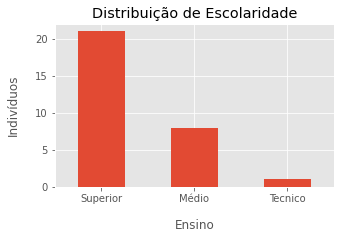

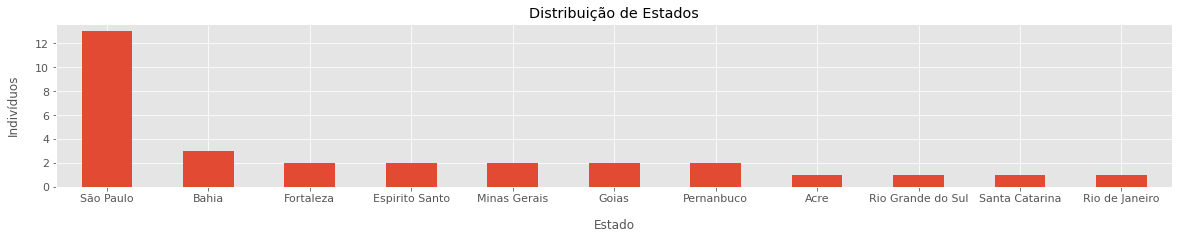

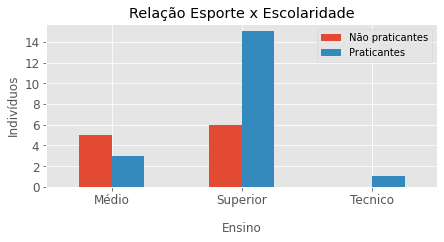

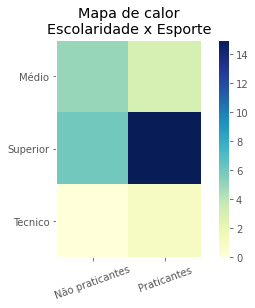




Respostas:

- A média de idades é de 32 anos.

- Existem 16 homens cadastrados e 14 mulheres cadastradas.

- A idade média dos homens é 31 anos e a das mulheres é 33 anos.

- 4 Pessoas gostam de caminhar no final de semana.

- A média salarial dos funcionários com menos de 3 anos de experiência é de 4152 reais.

- A média salarial dos funcionários com mais de 3 anos de experiência é de 7028 reais.

- O maior salario dentre os funcionário com menos de 3 anos de experiência é de 1200 reais.

- O maior salario dentre os funcionário com mais de 3 anos de experiência é de 2000 reais.

- O menor salario dentre os funcionário com menos de 3 anos de experiência é de 900 reais.

- O menor salario dentre os funcionário com mais de 3 anos de experiência é de 1200 reais.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class Exercicio:
    plt.style.use('ggplot')   
    
    #Aletere aqui o path dos arquivos
    dfCadastro = pd.read_csv(r"/Users/thyelleteruya/Documents/cadastro - cadastro - cadastro - cadastro.csv")
    dfSalario = pd.read_csv(r"/Users/thyelleteruya/Documents/salario_profissoes - salario_profissoes - salario_profissoes - salario_profissoes.csv")
    
    #tratando NaNs
    dfCadastro["pratica_esporte"] = dfCadastro["pratica_esporte"].fillna("não")
    dfCadastro["quanta_vezes_na_semana_pratica_esporte"] = dfCadastro["quanta_vezes_na_semana_pratica_esporte"].fillna(0)
    dfCadastro["tem carro"] = dfCadastro["tem carro"].fillna("não")
    
    
    #Calculando média de idades geral
    listaIdades = (dfCadastro["ano_nascimento"] - 2020)*-1
    mediaIdades = listaIdades.mean()
    
    r1 = "- A média de idades é de \033[1m" + str(mediaIdades)[0:2] + "\033[0m anos.\n"
   
    
    #Calculando Quantidade de homens e mulheres    
    qtdSexo = dfCadastro["sexo"].value_counts() 
    
    r2 = "- Existem \033[1m" + str(qtdSexo[0]) + "\033[0m homens cadastrados e \033[1m" + str(qtdSexo[1]) + "\033[0m mulheres cadastradas.\n"
    
    
    #Calculando média de idades por sexo    
    idadeHomens = (dfCadastro.loc[dfCadastro['sexo'] == 'm']["ano_nascimento"] - 2020)*-1
    idadeMulheres = (dfCadastro.loc[dfCadastro['sexo'] == 'f']["ano_nascimento"] - 2020)*-1
    
    r3 = "- A idade média dos homens é \033[1m" + str(idadeHomens.mean())[0:2] + "\033[0m anos e a das mulheres é \033[1m" + str(idadeMulheres.mean())[0:2] + "\033[0m anos.\n"
    
    
    #Quantas pessoas gostam de caminhar fds           
    filtroCaminhada = dfCadastro[dfCadastro['lazer_final_de_semana'].str.contains("caminhar")]
    
    r4 = "- \033[1m" + str(len(filtroCaminhada.index)) + "\033[0m Pessoas gostam de caminhar no final de semana."
    
    
    #Gráfico de barras escolaridade
    dfCadastro["escolaridade"] = dfCadastro["escolaridade"].str.lower()
    dfCadastro["escolaridade"] = dfCadastro["escolaridade"].str[7:]
    dfEscol = (dfCadastro["escolaridade"]).str.capitalize()
    dfEscolCount = dfEscol.value_counts()
    
    
    ax = dfEscolCount.plot(kind='bar', title = "Distribuição de Escolaridade", figsize=(5, 3), fontsize=10, rot=0)
    ax.set_ylabel("Indivíduos", fontsize=12, labelpad = 15)
    ax.set_xlabel("Ensino", fontsize=12, labelpad=15)
    plt.show()
    
    
    #Gráfico de estados        
    print("\n\n\n")
    dfEstado= (dfCadastro["cidade"])
    dfEstado = dfEstado.replace(['São Vicente', 'Santos', 'São Caetano', 'Santo Andre', 'Monte Alto', 'Aparecida'], 'São Paulo')
    dfEstado = dfEstado.replace(['Vitoria'], 'Espirito Santo')  
    dfEstadoCount= dfEstado.value_counts()
    
    ax2 = dfEstadoCount.plot(kind='bar', title = "Distribuição de Estados", figsize=(20, 3), fontsize=11, rot=0)
    ax2.set_xlabel("Estado", fontsize=12, labelpad=15)
    ax2.set_ylabel("Indivíduos", fontsize=12, labelpad=15)
    
    plt.show()
        
        
    #Gráfico Escolaridade x quem pratica Esporte    
    dfEscol = dfEscol.to_frame()
    dfEsporte = dfCadastro['pratica_esporte'].to_frame()
    dfAdjust = pd.merge(dfEscol, dfEsporte, left_index=True, right_index=True)                        
        
      
    dfEscolEspor = dfAdjust.groupby(['escolaridade', ], axis=0, as_index=False).sum()   
    dfEscolEspor['Não praticantes'] = dfEscolEspor['pratica_esporte'].str.count('não')
    dfEscolEspor['Praticantes'] = dfEscolEspor['pratica_esporte'].str.count('sim')
    dfEscolEspor.drop('pratica_esporte', axis=1, inplace=True)
    
    dfEscolEspor = dfEscolEspor.set_index('escolaridade')
    
    
    

    
    ax3 = dfEscolEspor.plot(kind='bar', title = "Relação Esporte x Escolaridade", figsize=(7, 3), fontsize=12, rot=0)
    ax3.set_ylabel("Indivíduos", fontsize=12)
    ax3.set_xlabel("Ensino", fontsize=12, labelpad=15)
    
    print("\n\n\n")
    
    plt.show()
    
    
    #Mapa de Calor  
    print("\n\n\n")
    
    plt.imshow(dfEscolEspor, cmap="YlGnBu")
    plt.colorbar()   
    plt.yticks(range(len(dfEscolEspor)), dfEscolEspor.index)
    plt.xticks(range(len(dfEscolEspor) - 1), dfEscolEspor.columns, rotation=20)
    plt.title('Mapa de calor\nEscolaridade x Esporte')
    plt.style.use('default')
    plt.grid(None)
    plt.show()
    
               
    #Cálculo de Média Salarial   
    salariosMenos = dfSalario["salario até 3 anos"].replace(0, np.nan)
    salariosMais =dfSalario["salaior +3 anos"].replace(0, np.nan)
    mediaSalarios0 = str(salariosMenos.mean())[0:4]
    mediaSalarios1 = str(salariosMais.mean())[0:4]
    
    print("")
    
    r5 = ("\n- A média salarial dos funcionários com menos de 3 anos de experiência é de \033[1m" + mediaSalarios0 + "\033[0m reais.\n\n- A média salarial dos funcionários com mais de 3 anos de experiência é de \033[1m"
          + mediaSalarios1 + "\033[0m reais.")
        
    
    #Quem tem o maior salário    
    topSalariosMenos = salariosMenos.max()
    topSalariosMais = salariosMais.max()
    
        
    r6 = ("\n- O maior salario dentre os funcionário com menos de 3 anos de experiência é de \033[1m" + str(topSalariosMenos)[0:4] + "\033[0m reais.\n\n" + 
         "- O maior salario dentre os funcionário com mais de 3 anos de experiência é de \033[1m" + str(topSalariosMais)[0:4] + "\033[0m reais.")
    
    
    #Quem recebe menos, exceto desempregado        
    leastSalariosMenos = salariosMenos.min(0)
    leastSalariosMais = salariosMais.min(0)
    
    r7 = ("\n- O menor salario dentre os funcionário com menos de 3 anos de experiência é de \033[1m" + str(leastSalariosMenos)[0:3] + "\033[0m reais.\n\n" + 
        "- O menor salario dentre os funcionário com mais de 3 anos de experiência é de \033[1m" + str(leastSalariosMais)[0:4] + "\033[0m reais.")
       
    print("\n\nRespostas:\n")
    print(r1)
    print(r2)
    print(r3)
    print(r4)
    print(r5)
    print(r6)
    print(r7)